## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_dataset = pd.merge(mouse_metadata, study_results)

# Display the data table for preview

combined_dataset.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
combined_dataset.shape

(1893, 8)

In [4]:
# Checking the number of mice.

mice_number1 = combined_dataset.groupby(["Mouse ID"]).count()
len(mice_number1.index)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Create a clean DataFrame by dropping the duplicate mouse by its ID.

bool_series = combined_dataset.duplicated(subset=['Mouse ID', 'Timepoint'])
print(bool_series)
print('\n')
print('This dataframe has been cleaned of the duplicate rows found in the "Mouse ID" and "Timepoint" columns:')

combined_dataset[~bool_series]

#This code was found from https://www.machinelearningplus.com/pandas/pandas-duplicated/ and altered for my particular use.

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


This dataframe has been cleaned of the duplicate rows found in the "Mouse ID" and "Timepoint" columns:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

cleaned_df = combined_dataset[~bool_series]
mice_number2 = cleaned_df.groupby('Mouse ID').count()
len(mice_number2.index)


249

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

tv_dr_df_mean = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].mean()

tv_dr_df_median = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].median()

tv_dr_df_mean_median = pd.merge(tv_dr_df_mean, tv_dr_df_median,
                                 how='outer', on='Drug Regimen')

tv_dr_df_mean_median.rename(columns = {"Tumour Volume (mm3)_x": "tumour_volume_mean", 
                                        "Tumour Volume (mm3)_y": "tumour_volume_median"}, inplace=True)

tv_dr_df_var = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].var()

tv_dr_df_mean_median_var = pd.merge(tv_dr_df_mean_median, tv_dr_df_var,
                                 how='outer', on='Drug Regimen')

tv_dr_df_std = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].std()

tv_dr_df_mean_median_var_std = pd.merge(tv_dr_df_mean_median_var, tv_dr_df_std,
                                 how='outer', on='Drug Regimen')

tv_dr_df_mean_median_var_std.rename(columns = {"Tumour Volume (mm3)_x": "tumour_volume_variance", 
                                        "Tumour Volume (mm3)_y": "tumour_volume_std"}, inplace=True)

tv_dr_df_sem = cleaned_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].sem()

tv_dr_df_mean_median_var_std_sem = pd.merge(tv_dr_df_mean_median_var_std, tv_dr_df_sem,
                                 how='outer', on='Drug Regimen')

tv_dr_df_mean_median_var_std_sem.rename(columns = {"Tumour Volume (mm3)": "tumour_volume_sem"}, inplace=True)

tv_dr_df_mean_median_var_std_sem.head(10)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.

,tumour_volume_mean,tumour_volume_median,tumour_volume_variance,tumour_volume_std,tumour_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tv_dr_df = cleaned_df.groupby(['Drug Regimen']).agg({'Tumour Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

print(tv_dr_df)

#I used https://jamesrledoux.com/code/group-by-aggregate-pandas for this code.

             Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot_split = cleaned_df[["Drug Regimen", "Timepoint"]]

bar_plot_drugs = bar_plot_split.groupby(['Drug Regimen'])

bar_plot_timepoints = bar_plot_drugs["Timepoint"].count()

bar_plot_timepoints.head(100)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

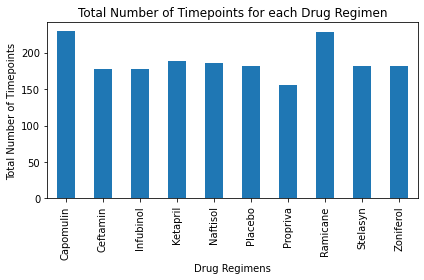

In [62]:
bar_plot_timepoints.plot(kind = "bar")

plt.title("Total Number of Timepoints for each Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.xlabel("Drug Regimens")
plt.tight_layout();

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(bar_plot_timepoints))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, bar_plot_timepoints["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, bar_plot_timepoints["Drug Regimen"], rotation="vertical")







KeyError: 'Timepoint'

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
